In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
# import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from collections import Counter

In [118]:
# load csv
cornell = pd.read_csv("cornell.csv")
cornell.head()

,professor,content,class_level,rating,date
0,Daisy Fan,She is great just do the work,CS1110,QUALITY\n4.0\nDIFFICULTY\n4.0,"Nov 8th, 2021"
1,Daisy Fan,Daisy Fan is the best! She basically inspired ...,CS1110,QUALITY\n5.0\nDIFFICULTY\n3.0,"May 12th, 2021"
2,Daisy Fan,An awesome class! She was an incredible lectur...,CS1112,QUALITY\n5.0\nDIFFICULTY\n3.0,"Apr 21st, 2021"
3,Daisy Fan,Took this class Fall 2020. Majority of work co...,CS1112,QUALITY\n5.0\nDIFFICULTY\n3.0,"Jan 15th, 2021"
4,Daisy Fan,Professor Fan did a great job describing all o...,CS1112,QUALITY\n5.0\nDIFFICULTY\n3.0,"Dec 1st, 2020"


In [119]:
# getting quality and difficulty scores
quality = []
difficulty = []
for x in cornell.index:
    score = cornell["rating"][x]
    quality.append(score.splitlines()[1])
    difficulty.append(score.splitlines()[3])
    # print(type(difficulty))

In [120]:
# adding quality and difficulty scores to dataframe
cornell["quality_score"] = quality
cornell["difficulty_score"] = difficulty

In [121]:
cornell.tail()

,professor,content,class_level,rating,date,quality_score,difficulty_score
928,Immanuel Trummer,Ambiguous Assignment with unrefined score judg...,CS4320,QUALITY\n4.0\nDIFFICULTY\n4.0,"Nov 19th, 2018",4.0,4.0
929,Immanuel Trummer,Learning from Trummer was the highlight of my ...,CS6320,QUALITY\n5.0\nDIFFICULTY\n3.0,"May 24th, 2018",5.0,3.0
930,Immanuel Trummer,Very good course,CS4320,QUALITY\n5.0\nDIFFICULTY\n4.0,"Apr 10th, 2018",5.0,4.0
931,Immanuel Trummer,Extremely good professor. Enjoyed the lectures...,CS4320,QUALITY\n5.0\nDIFFICULTY\n3.0,"Apr 10th, 2018",5.0,3.0
932,Immanuel Trummer,Trummer was a below average professor. His lec...,CS4320,QUALITY\n2.0\nDIFFICULTY\n3.0,"Jan 23rd, 2018",2.0,3.0


In [122]:
# drop original rating column
cornell = cornell.drop(['rating'], axis=1)
cornell.head()

,professor,content,class_level,date,quality_score,difficulty_score
0,Daisy Fan,She is great just do the work,CS1110,"Nov 8th, 2021",4.0,4.0
1,Daisy Fan,Daisy Fan is the best! She basically inspired ...,CS1110,"May 12th, 2021",5.0,3.0
2,Daisy Fan,An awesome class! She was an incredible lectur...,CS1112,"Apr 21st, 2021",5.0,3.0
3,Daisy Fan,Took this class Fall 2020. Majority of work co...,CS1112,"Jan 15th, 2021",5.0,3.0
4,Daisy Fan,Professor Fan did a great job describing all o...,CS1112,"Dec 1st, 2020",5.0,3.0


In [124]:
date = cornell['date']
dt = []
for d in date:
    d.replace(' ', '')
    d = pd.to_datetime(d, infer_datetime_format=True)
    dt.append(d)

In [125]:
cornell['date']= dt

In [126]:
cornell.head()

,professor,content,class_level,date,quality_score,difficulty_score
0,Daisy Fan,She is great just do the work,CS1110,2021-11-08,4.0,4.0
1,Daisy Fan,Daisy Fan is the best! She basically inspired ...,CS1110,2021-05-12,5.0,3.0
2,Daisy Fan,An awesome class! She was an incredible lectur...,CS1112,2021-04-21,5.0,3.0
3,Daisy Fan,Took this class Fall 2020. Majority of work co...,CS1112,2021-01-15,5.0,3.0
4,Daisy Fan,Professor Fan did a great job describing all o...,CS1112,2020-12-01,5.0,3.0


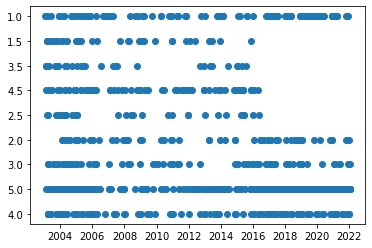

In [131]:
plt.scatter(cornell["date"], cornell["quality_score"])